In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
#fonte Amazon Brazil Products 2023
data = pd.read_json('amazonv.json')
data.head()

,title,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth
0,"SAMSUNG Smart TV Crystal 50"" 4K UHD CU7700 - A...",4.6,269,2279.05,"TV, Áudio e Cinema em Casa",False,0
1,Mini Projetor Portatil 5G Wifi 6 Bluetooth 5.0...,4.5,816,409.99,"TV, Áudio e Cinema em Casa",True,5000
2,"Samsung Smart TV Crystal 43"" 4K UHD CU7700 - A...",4.7,638,1969.00,"TV, Áudio e Cinema em Casa",False,0
3,"Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...",4.6,675,3099.00,"TV, Áudio e Cinema em Casa",False,0
4,Smart TV LED 32'' HD Samsung LH32BETBLGGXZD,4.7,3945,1079.90,"TV, Áudio e Cinema em Casa",True,0


In [354]:
data['categoryName'] = data['categoryName'].replace('TVs', 'TV, Áudio e Cinema em Casa') #juntando as categorias 'TVs e tv,audio...
data['categoryName'].unique()

array(['TV, Áudio e Cinema em Casa', 'Pet Shop', 'eBooks Gratuitos',
       'Jardim e Piscina', 'Produtos de Decoração para Casa',
       'Café, Chá e Expresso', 'Fire TV Stick Apps',
       'Equipamento para Trilha e Acampamento',
       'Novidades da Loja Kindle',
       'Skates, Patins, Patinetes e Acessórios', 'Apps e Jogos',
       'Produtos de Cuidados com a Pele', 'Eletrônicos', 'Mochilas',
       'Ferramentas de Medição',
       'Produtos de Proteção do Sol e Bronzeadores',
       'Móveis para Escritório', 'Acessórios para Viagem', 'Bebês',
       'Equipamentos de Rega para Grama e Jardim',
       'Acessórios de Ferramentas Elétricas', 'Telefones e Acessórios',
       'Desodorantes e Antitranspirantes', 'Talheres', 'Tablets',
       'Malas de Viagem', 'Utensílios de Limpeza',
       'PlayStation 5, Jogos, Consoles e Acessórios',
       'Roteadores, Modems e Dispositivos de Rede',
       'Peças e Acessórios para Automóveis', 'Cortinas e Persianas',
       'Drones e Acessórios', 

In [355]:
data_min = data.loc[(data['reviews'] >= 10)] #criando um novo dataset apenas com produtos com pelo menos 10 reviews
data_min.head()

,title,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth
0,"SAMSUNG Smart TV Crystal 50"" 4K UHD CU7700 - A...",4.6,269,2279.05,"TV, Áudio e Cinema em Casa",False,0
1,Mini Projetor Portatil 5G Wifi 6 Bluetooth 5.0...,4.5,816,409.99,"TV, Áudio e Cinema em Casa",True,5000
2,"Samsung Smart TV Crystal 43"" 4K UHD CU7700 - A...",4.7,638,1969.00,"TV, Áudio e Cinema em Casa",False,0
3,"Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...",4.6,675,3099.00,"TV, Áudio e Cinema em Casa",False,0
4,Smart TV LED 32'' HD Samsung LH32BETBLGGXZD,4.7,3945,1079.90,"TV, Áudio e Cinema em Casa",True,0


[Text(0.5, 1.0, 'Distribuição dos reviews'),
 Text(0.5, 0, 'Nota'),
 Text(0, 0.5, 'Quantidade')]

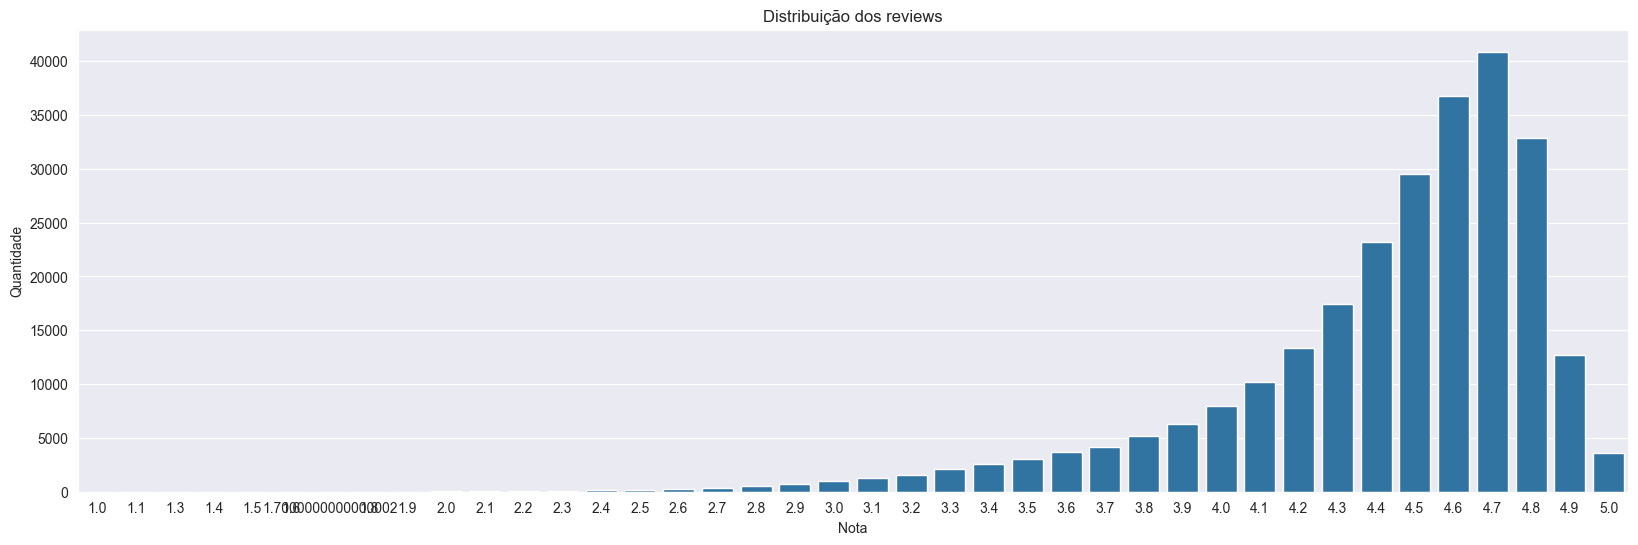

In [356]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data= data_min, x='stars')
ax.set(title='Distribuição dos reviews', xlabel='Nota', ylabel='Quantidade')

[Text(0.5, 1.0, 'Preço médio dos produtos das categorias mais caras'),
 Text(0, 0.5, 'Preço médio'),
 Text(0.5, 0, '')]

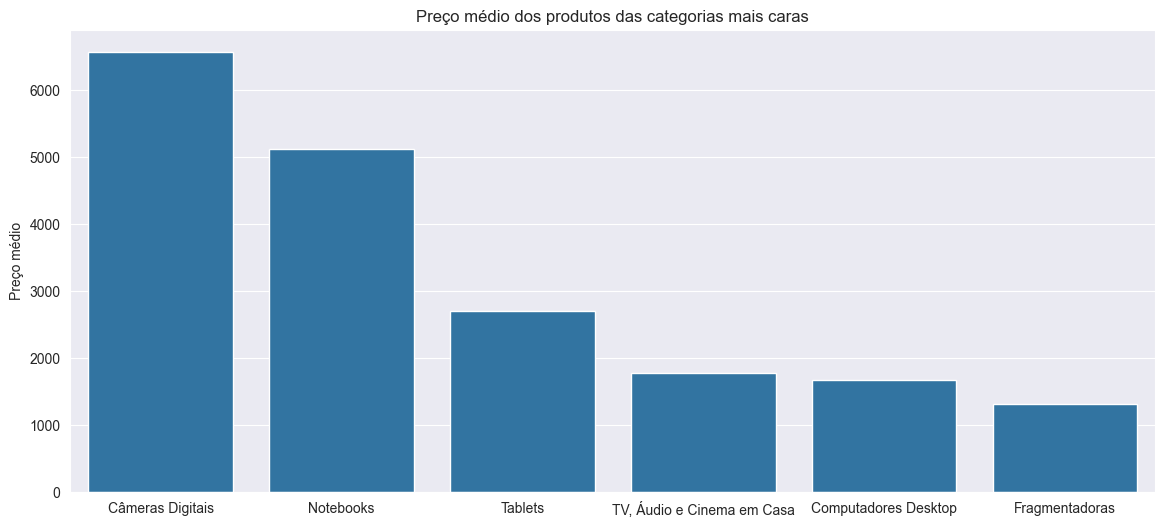

In [357]:
df_novo = data_min.groupby('categoryName')['price'].mean().sort_values(ascending=False).head(6) #separando uma serie das categorias pelo preço medio

plt.figure(figsize=(14,6))
ax = sns.barplot(data= df_novo)
ax.set(title= 'Preço médio dos produtos das categorias mais caras', ylabel='Preço médio', xlabel='')


[Text(0.5, 1.0, 'Produtos mais vendidos do último mês'),
 Text(0.5, 0, 'Quantidade vendida'),
 Text(0, 0.5, '')]

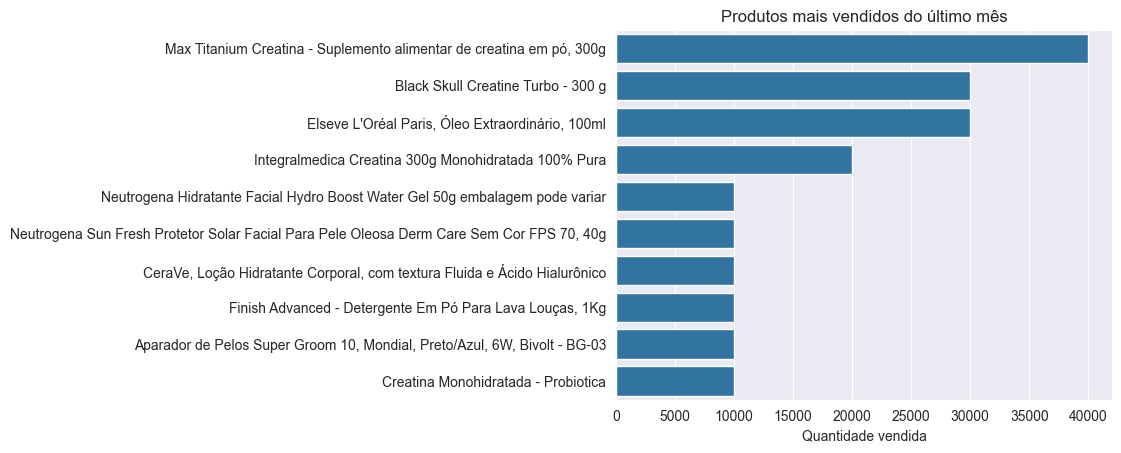

In [358]:
mais_vendidos = data.nlargest(10, 'boughtInLastMonth')

ax = sns.barplot(data= mais_vendidos, x='boughtInLastMonth', y='title', orient='h') 
ax.set(title='Produtos mais vendidos do último mês', xlabel='Quantidade vendida', ylabel='')



[Text(0.5, 1.0, 'Produtos com pelo menos 10 reviews com as piores avaliações'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Quantidade de reviews')]

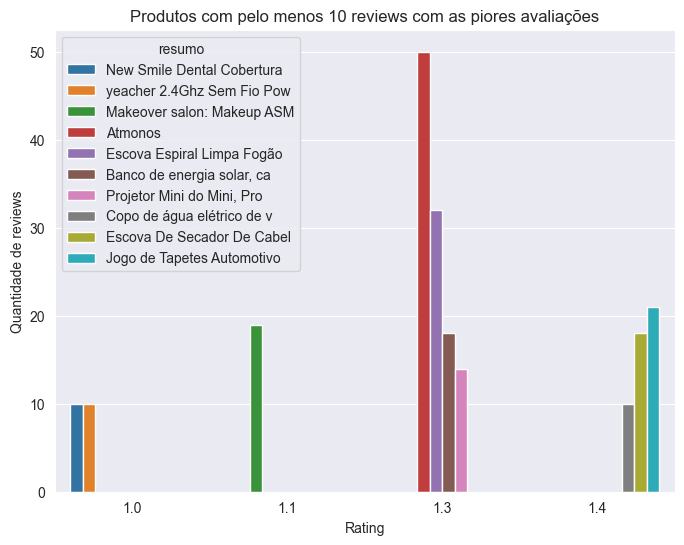

In [359]:
mal_avaliados = data_min.nsmallest(10 , 'stars') #separando produtos com as piores avaliações
mal_avaliados['resumo'] = mal_avaliados['title'].str[:26] #resumo da string title

plt.figure(figsize=(8,6))
ax = sns.barplot(data=mal_avaliados, x='stars', y='reviews', hue='resumo')
ax.set(title='Produtos com pelo menos 10 reviews com as piores avaliações', xlabel='Rating', ylabel='Quantidade de reviews')



[Text(0.5, 1.0, 'Categorias mais vendidas'),
 Text(0.5, 0, 'Variedade de produtos'),
 Text(0, 0.5, '')]

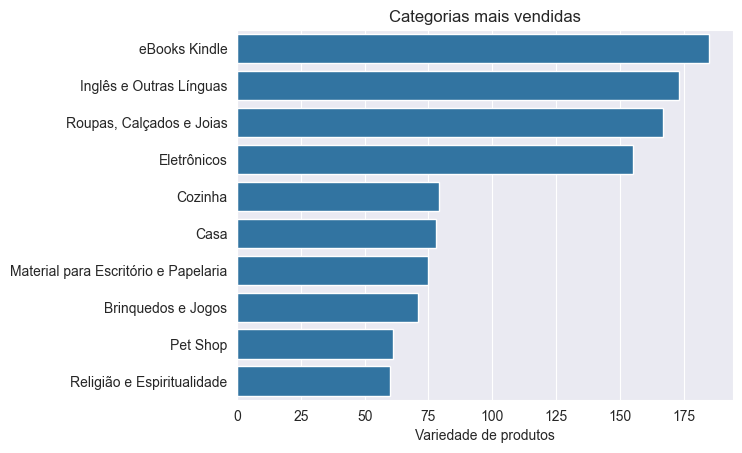

In [360]:
df_filtro = data[data['isBestSeller'] == True] #produtos que são bestseller
df_filtro = df_filtro['categoryName'].value_counts().sort_values(ascending=False).head(10) #somando a quantidade de produtos best seller por categoria
df_filtro = pd.DataFrame(df_filtro)


ax = sns.barplot(data=df_filtro, x='count', y='categoryName')
ax.set(title='Categorias mais vendidas', xlabel='Variedade de produtos', ylabel='')


   

In [361]:
data_min.to_excel('C:/Users/ianki.DESKTOP-G971D0K/Downloads/amazonv.xlsx', index=False)